### 라이브러리

In [391]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

### 데이터 처리

In [392]:
train = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/train.csv')
test = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/test.csv')
submission = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')

In [393]:
weekdayrankfordinner = {
    '월' : 1,
    '화' : 2,
    '수' : 4,
    '목' : 3,
    '금' : 5
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

In [394]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.isocalendar().week
train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.isocalendar().week
test['요일'] = test['일자'].dt.weekday

train['주'] = train['주'].astype('int') # '주'의 타입이 Uint로 사용이 안되어 int로 변경해줌.
test['주'] = test['주'].astype('int')

In [395]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [396]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [397]:
# month1 = {
#     1:3,
#     2:1,
#     3:2,
#     4:6,
#     5:7,
#     6:8,
#     7:10,
#     8:9,
#     9:5,
#     10:4,
#     11:11,
#     12:12
# }

month1 = {
	6	:	12	,
	5	:	11	,
	8	:	10	,
	1	:	9	,
	7	:	8	,
	10	:	7	,
	9	:	6	,
	11	:	5	,
	4	:	4	,
	2	:	3	,
	3	:	2	,
	12	:	1	
}




month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

In [398]:
train['공휴일전후1'] = 0
test['공휴일전후1'] = 0

train['공휴일전후2'] = 0
test['공휴일전후2'] = 0

In [399]:
train['공휴일전후1'][4] = 1 #2
train['공휴일전후1'][17] = 1 #
#train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후1'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후1'][152] = 1
train['공휴일전후1'][226] = 1
train['공휴일전후1'][221] = 1
#train['공휴일전후'][222] = 1
train['공휴일전후1'][224] = 1
train['공휴일전후1'][225] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후1'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후1'][310] = 2
train['공휴일전후1'][311] = 1
train['공휴일전후1'][309] = 1
train['공휴일전후1'][330] = 1
train['공휴일전후1'][379] = 1
train['공휴일전후1'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후1'][470] = 1
train['공휴일전후1'][502] = 2
# train['공휴일전후'][501] = 1
train['공휴일전후1'][511] = 1
train['공휴일전후1'][565] = 1
train['공휴일전후1'][623] = 1
train['공휴일전후1'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후1'][705] = 2
# train['공휴일전후'][707] = 1
train['공휴일전후1'][709] = 2
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후1'][815] = 2
train['공휴일전후1'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후1'][950] = 1
train['공휴일전후1'][951] = 1
train['공휴일전후1'][953] = 2
train['공휴일전후1'][954] = 1
train['공휴일전후1'][955] = 1
train['공휴일전후1'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후1'][1038] = 1
train['공휴일전후1'][1099] = 1
train['공휴일전후1'][1129] = 2
# train['공휴일전후'][1128] = 1
train['공휴일전후1'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후1'][10] =2
test['공휴일전후1'][20] = 1

In [400]:
train['공휴일전후2'][4] = 1 #2
train['공휴일전후2'][17] = 1 #
#train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후2'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후2'][152] = 1
train['공휴일전후2'][226] = 1
train['공휴일전후2'][221] = 1
#train['공휴일전후'][222] = 1
train['공휴일전후2'][224] = 1
train['공휴일전후2'][225] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후2'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후2'][310] = 2
train['공휴일전후2'][311] = 1
train['공휴일전후2'][309] = 1
train['공휴일전후2'][330] = 1
train['공휴일전후2'][379] = 1
train['공휴일전후2'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후2'][470] = 1
train['공휴일전후2'][502] = 2
# train['공휴일전후'][501] = 1
train['공휴일전후2'][511] = 1
train['공휴일전후2'][565] = 1
train['공휴일전후2'][623] = 1
train['공휴일전후2'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후2'][705] = 2
# train['공휴일전후'][707] = 1
train['공휴일전후2'][709] = 2
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후2'][815] = 2
train['공휴일전후2'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후2'][950] = 1
train['공휴일전후2'][951] = 1
train['공휴일전후2'][953] = 2
train['공휴일전후2'][954] = 1
train['공휴일전후2'][955] = 1
train['공휴일전후2'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후2'][1038] = 1
train['공휴일전후2'][1099] = 1
train['공휴일전후2'][1129] = 2
# train['공휴일전후'][1128] = 1
train['공휴일전후2'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후2'][10] =2
test['공휴일전후2'][20] = 1





# test['공휴일전후2'][18] =2 # 석식에만 추가
# test['공휴일전후2'][42] =2 # 석식에만 추가

In [401]:
# 원핫인코딩
train = pd.get_dummies(train, columns=['공휴일전후1'])
test = pd.get_dummies(test, columns=['공휴일전후1'])

train = pd.get_dummies(train, columns=['공휴일전후2'])
test = pd.get_dummies(test, columns=['공휴일전후2'])

In [402]:
test['공휴일전후1_0'][20] = 1
test['공휴일전후1_1'][20] = 0

test['공휴일전후2_0'][20] = 1
test['공휴일전후2_1'][20] = 0

In [403]:

# train = pd.get_dummies(train, columns=['요일'])
# test = pd.get_dummies(test, columns=['요일'])

In [404]:
train[train.석식계>0]['석식계'].mean() # 0이아닌값 평균


478.8605851979346

In [405]:
train[train.석식계>0]['석식계'].mean() # 0이아닌값 평균

# 현재 1월만 대체
train['석식계'][244] = 479.8605851979346

#train['석식계'][281] = 398
train['석식계'][492] = 479.8605851979346

#train['석식계'][502] = 398
#train['석식계'][510] = 398
#train['석식계'][529] = 398
train['석식계'][730] = 479.8605851979346

#train['석식계'][747] = 398
#train['석식계'][766] = 398
train['석식계'][973] = 479.8605851979346

#train['석식계'][993] = 398

# 1 2 3 월 자기개발의날 대체.

In [406]:
# train.loc[(train.요일==4), '석식계'] -= 9

In [407]:
# # train.loc[(train.요일==0), '중식계'] -= 30
# train.loc[((train.요일==1) & (train.월<=4)), '중식계'] -= 10
# train.loc[((train.요일==2) & (train.월<=4)), '중식계'] -= 10
# # train.loc[(train.요일==3), '중식계'] -= 50

### TOP Score

In [408]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [409]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '요일(석식)', '년', '월', '일', '주', '식사가능자수',
       '월(중식)', '월(석식)', '공휴일전후1_0', '공휴일전후1_1', '공휴일전후1_2', '공휴일전후2_0',
       '공휴일전후2_1', '공휴일전후2_2'],
      dtype='object')

In [410]:
# train = train[train.석식계!= 0]


x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월', '일','본사출장자수']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월', '일','본사출장자수']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','본사출장자수']]

In [411]:
model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2

Learning rate set to 0.040347
0:	learn: 204.8292996	total: 1.75ms	remaining: 1.75s
1:	learn: 199.6189667	total: 4.21ms	remaining: 2.1s
2:	learn: 195.3471560	total: 6.56ms	remaining: 2.18s
3:	learn: 190.6789052	total: 8.34ms	remaining: 2.08s
4:	learn: 186.7269023	total: 10.6ms	remaining: 2.1s
5:	learn: 182.9394124	total: 11.6ms	remaining: 1.93s
6:	learn: 179.7832990	total: 12.5ms	remaining: 1.77s
7:	learn: 176.0132022	total: 14.2ms	remaining: 1.76s
8:	learn: 172.2301893	total: 15.9ms	remaining: 1.75s
9:	learn: 168.4580340	total: 17.6ms	remaining: 1.74s
10:	learn: 165.0713858	total: 19.6ms	remaining: 1.76s
11:	learn: 162.0616286	total: 21.5ms	remaining: 1.77s
12:	learn: 158.9978911	total: 23.1ms	remaining: 1.76s
13:	learn: 156.1848628	total: 25.1ms	remaining: 1.77s
14:	learn: 153.5045617	total: 26.4ms	remaining: 1.73s
15:	learn: 151.0606807	total: 29.2ms	remaining: 1.8s
16:	learn: 148.6386700	total: 33.7ms	remaining: 1.95s
17:	learn: 146.4262354	total: 35.6ms	remaining: 1.94s
18:	learn: 

In [390]:
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,1005.084854,295.817364
1,2021-01-28,967.294763,496.398225
2,2021-01-29,590.638330,191.270340


In [366]:
submission

,일자,중식계,석식계
0,2021-01-27,1001.971316,295.817364
1,2021-01-28,972.194727,496.398225
2,2021-01-29,579.353947,191.270340
3,2021-02-01,1227.451029,533.714239
4,2021-02-02,1027.280014,566.583226
5,2021-02-03,1075.808607,511.629029
6,2021-02-04,1020.541170,562.391293
7,2021-02-05,707.033104,298.574674
8,2021-02-08,1301.627249,678.219368
9,2021-02-09,1062.638727,578.691886


In [412]:
# submission.중식계 = submission.중식계-5

In [413]:
submission['석식계'].mean()

516.8180634873239

In [414]:
submission.to_csv('1대체금20월.csv', index=False)

In [84]:
submission.중식계.mean()

989.4985815566887

In [339]:
train[train.요일==4].석식계 = train[train.요일==4].석식계 + 20

In [340]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '요일(석식)', '년', '월', '일', '주', '식사가능자수',
       '월(중식)', '월(석식)', '공휴일전후1_0', '공휴일전후1_1', '공휴일전후1_2', '공휴일전후2_0',
       '공휴일전후2_1', '공휴일전후2_2'],
      dtype='object')

In [72]:
train.columns

Index(['일자', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '중식계', '석식계', '요일(석식)', '년', '월', '일', '주', '식사가능자수', '월(중식)', '월(석식)',
       '공휴일전후1_0', '공휴일전후1_1', '공휴일전후1_2', '공휴일전후2_0', '공휴일전후2_1', '공휴일전후2_2',
       '요일_0', '요일_1', '요일_2', '요일_3', '요일_4'],
      dtype='object')

In [173]:
print(train.mean()['중식계'],'\n',
      train.query('월<4 & 월>1').mean()['중식계'], '\n',
      train.query('월<4 & 월>1 & 년 == 2020').mean()['중식계'])

890.3344398340249 
 970.355 
 952.4285714285714


In [118]:
submission.mean()['중식계']

953.469185896924

In [119]:
train.groupby('년').mean()[['중식계','석식계']]

,중식계,석식계
년,,
2016,896.801762,519.418502
2017,861.508197,459.015822
2018,847.255230,465.547534
2019,814.739837,447.336832
2020,845.931034,432.736468
2021,973.235294,396.588235


In [341]:
submission['일자'] = pd.to_datetime(submission['일자'])
submission['요일'] = submission['일자'].dt.weekday

In [342]:
submission.groupby('요일').mean()['중식계']

요일
0    1258.141141
1    1060.814333
2    1016.744869
3     955.046232
4     654.647571
Name: 중식계, dtype: float64

In [343]:
submission.mean()

중식계    984.250904
석식계    516.818063
요일       2.040000
dtype: float64

In [344]:
train.query('월 <=3 & 월 >=2 & 년 == 2020').groupby('요일').mean()['중식계']

요일
0    1222.000000
1     995.555556
2     950.875000
3     859.250000
4     674.125000
Name: 중식계, dtype: float64

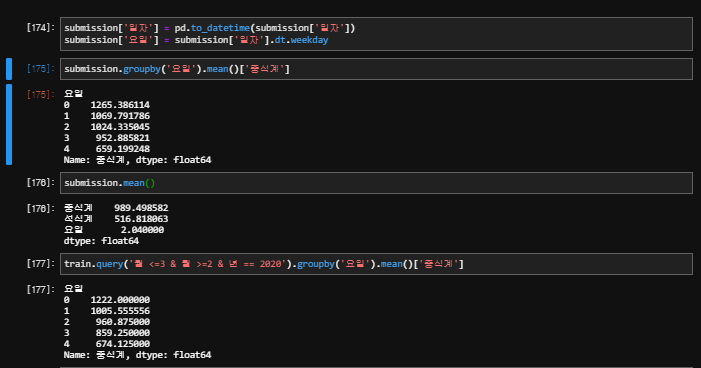

기본

In [373]:
train.groupby('월').mean()['중식계'].sort_values()

월
12    827.336634
11    847.333333
7     848.736364
8     854.785047
6     863.311111
5     869.787879
4     879.737864
9     907.148936
10    917.771739
1     929.990099
3     949.682243
2     985.752688
Name: 중식계, dtype: float64

In [374]:
train.query('년==2020').groupby('월').mean()['중식계'].sort_values()

월
6      760.000000
5      815.578947
8      825.100000
1      826.300000
7      827.826087
10     852.684211
9      871.650000
11     878.095238
4      920.650000
2      942.200000
3      954.000000
12    1048.500000
Name: 중식계, dtype: float64